In [1]:
import pandas as pd
import numpy as np
df_titannic = pd.read_csv('./dataset/train.csv')
df_titannic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_titannic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [3]:
df_titannic['Age'] = df_titannic['Age'].fillna(0)

In [4]:
# 把类别型变量转换为哑变量
a = pd.get_dummies(df_titannic['Sex'], prefix="Sex")
b = pd.get_dummies(df_titannic['Embarked'], prefix="Em")
# 把哑变量添加进dataframe
frames = [df_titannic, a, b]
df_titannic = pd.concat(frames, axis=1)
df_titannic = df_titannic.drop(columns=['Sex', 'Embarked'])
df_titannic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [5]:
X = df_titannic.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = df_titannic.Survived.values     # 构建标签集
y = y.reshape(-1, 1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
import matplotlib.pyplot as plt
def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training ans Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [11]:
from sklearn.metrics import classification_report 
def show_report(X_test, y_test, y_pred):
    print(classification_report(y_test, y_pred, labels=[0, 1]))

In [12]:
# 简单神经网络，请读者自行调试参数，优化设定
import keras
from keras.models import Sequential
from keras.layers  import Dense
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=11, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'RMSProp', loss = 'binary_crossentropy', metrics = ['acc'])
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
12/12 [==============================] - 0s 10ms/step - loss: 0.6170 - acc: 0.6938 - val_loss: 0.6021 - val_acc: 0.6927
Epoch 2/30
12/12 [==============================] - 0s 1ms/step - loss: 0.5280 - acc: 0.7893 - val_loss: 0.6846 - val_acc: 0.6760
Epoch 3/30
12/12 [==============================] - 0s 2ms/step - loss: 0.5044 - acc: 0.7935 - val_loss: 0.5647 - val_acc: 0.7263
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4859 - acc: 0.8104 - val_loss: 0.5370 - val_acc: 0.7654
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4602 - acc: 0.8188 - val_loss: 0.5730 - val_acc: 0.7709
Epoch 6/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4476 - acc: 0.8174 - val_loss: 0.5185 - val_acc: 0.7542
Epoch 7/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4446 - acc: 0.8244 - val_loss: 0.5222 - val_acc: 0.7654
Epoch 8/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4380 - acc: 0.8

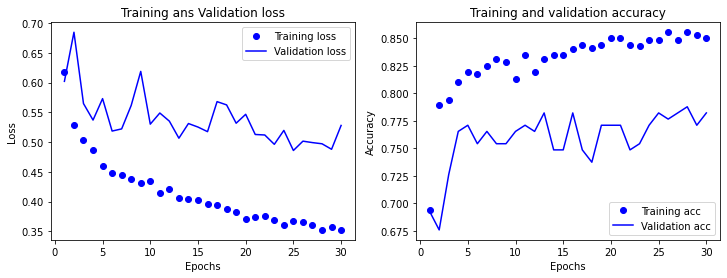

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       111
           1       0.81      0.56      0.66        68

    accuracy                           0.78       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179



In [13]:
show_history(history)
show_report(X_test, y_test, y_pred)

In [14]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
lr = LogisticRegression() # lr,就代表是逻辑回归模型
lr.fit(X_train,y_train) # fit,就相当于是梯度下降
print("SK-learn逻辑回归测试准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

SK-learn逻辑回归测试准确率 73.74%


d:\Anaconda3\envs\Vuean_ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
